In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cc_info = pd.read_csv("cc_info.csv")
transaction_info= pd.read_csv("transactions.csv")

In [16]:
cc_info.head()


,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [17]:
transaction_info.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [7]:
cc_info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [8]:
transaction_info.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [9]:
df = transaction_info.merge(cc_info, on='credit_card')
df.head()


,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [10]:
df.shape

(294588, 9)

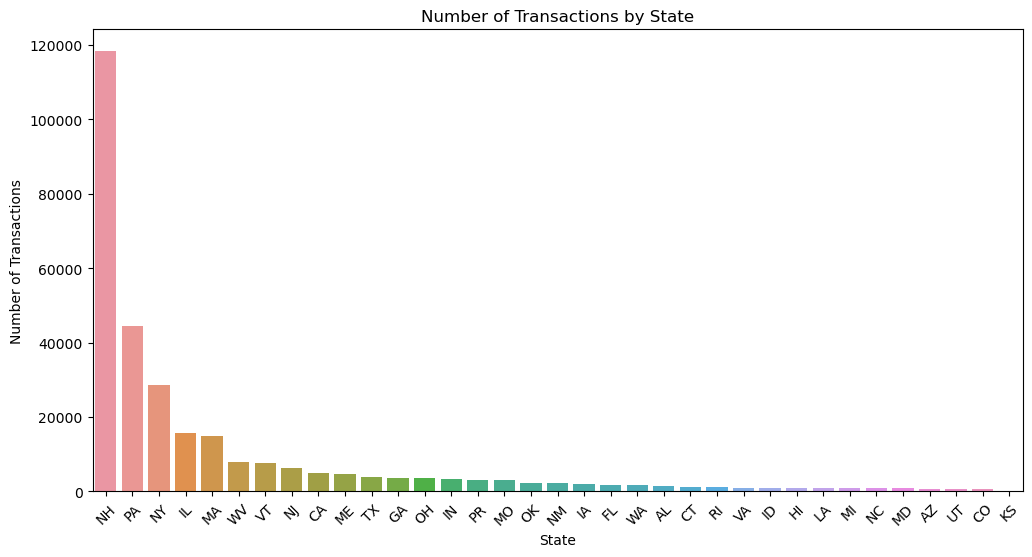

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['state'].value_counts().index, y=df['state'].value_counts().values)
plt.title('Number of Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

C:\Users\olisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


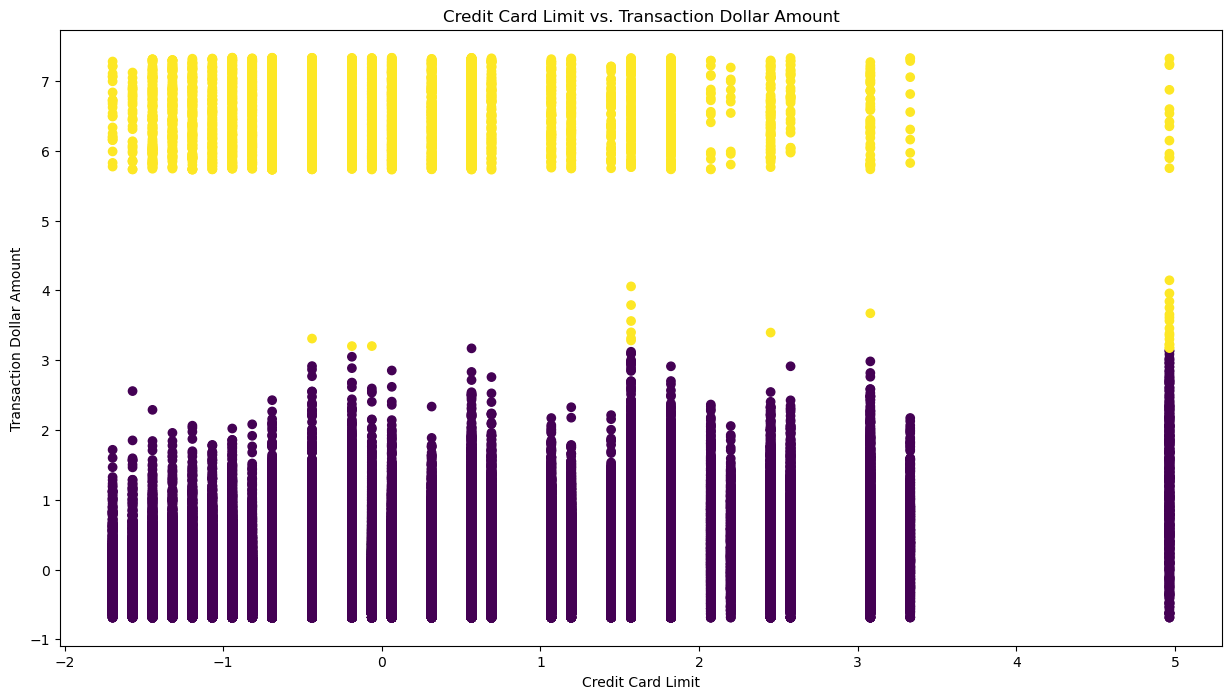

Model Training Complete.
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57830
           1       1.00      1.00      1.00      1088

    accuracy                           1.00     58918
   macro avg       1.00      1.00      1.00     58918
weighted avg       1.00      1.00      1.00     58918

Confusion Matrix:
[[57830     0]
 [    1  1087]]


In [38]:
class FraudDetectionModel:
    def __init__(self, df):
        self.df = df
        self.feature_columns = ['transaction_dollar_amount', 'Long', 'Lat', 'credit_card_limit']
        self.model = None
        self.kmeans = None

    def data_preprocessing(self):
        scaler = StandardScaler()
        self.df[self.feature_columns] = scaler.fit_transform(self.df[self.feature_columns])

    def build_kmeans(self, n_clusters=2):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    def create_labels(self):
        if self.kmeans is None:
            raise ValueError("K-means model has not been built yet. Please call 'build_kmeans' first.")

        self.kmeans.fit(self.df[self.feature_columns])
        
        self.df['cluster_label'] = self.kmeans.predict(self.df[self.feature_columns])

        cluster_fraud_label = self.df.groupby('cluster_label')['transaction_dollar_amount'].mean().idxmax()
        self.df['is_fraudulent'] = self.df['cluster_label'].apply(lambda x: 1 if x == cluster_fraud_label else 0)

    def visualize_fraudulent_transactions(self):
        plt.figure(figsize=(15, 8))
        plt.scatter(self.df['credit_card_limit'], self.df['transaction_dollar_amount'], c=self.df['is_fraudulent'])
        plt.title('Credit Card Limit vs. Transaction Dollar Amount')
        plt.xlabel('Credit Card Limit')
        plt.ylabel('Transaction Dollar Amount')
        plt.show()

    def build_model(self):
        pass

    def train_model(self, X_train, y_train):
        self.model = LogisticRegression()
        self.model.fit(X_train, y_train)

    def evaluate_model(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

if __name__ == "__main__":
    # Load data and perform necessary preprocessing
    card_info = pd.read_csv('cc_info.csv')
    transaction_info = pd.read_csv('transactions.csv')
    df = transaction_info.merge(card_info, on='credit_card')
    
    model = FraudDetectionModel(df)
    model.data_preprocessing()
    model.build_kmeans()
    model.create_labels()

    model.visualize_fraudulent_transactions()

    X = model.df[model.feature_columns].values
    y = model.df['is_fraudulent'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.train_model(X_train, y_train)

    print("Model Training Complete.")

    model.evaluate_model(X_test, y_test)

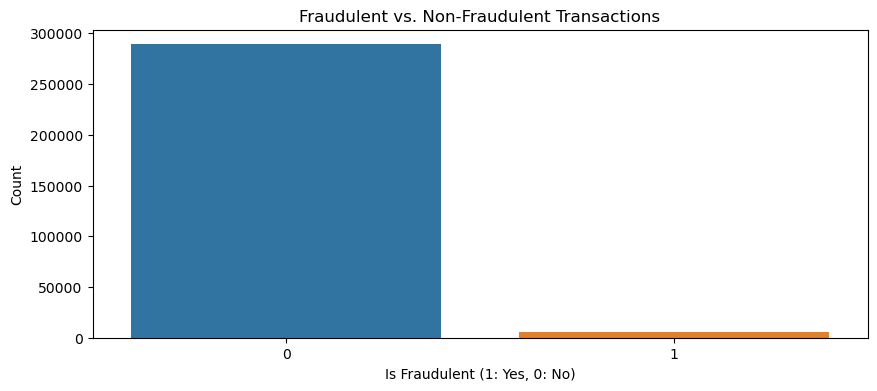

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(data=model.df, x='is_fraudulent')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

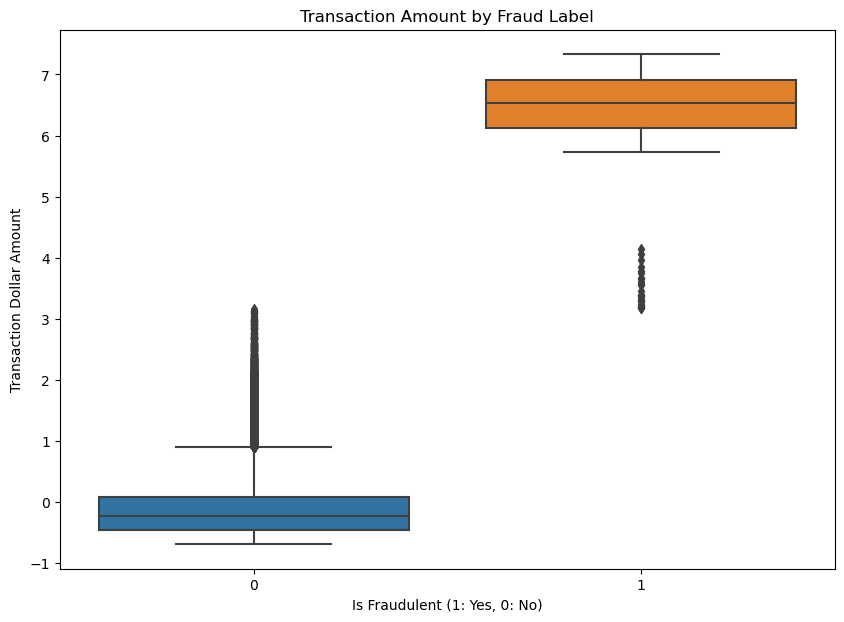

In [40]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=model.df, x='is_fraudulent', y='transaction_dollar_amount')
plt.title('Transaction Amount by Fraud Label')
plt.xlabel('Is Fraudulent (1: Yes, 0: No)')
plt.ylabel('Transaction Dollar Amount')
plt.show()

C:\Users\olisa\AppData\Local\Temp\ipykernel_55016\4091475779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model.df.corr()


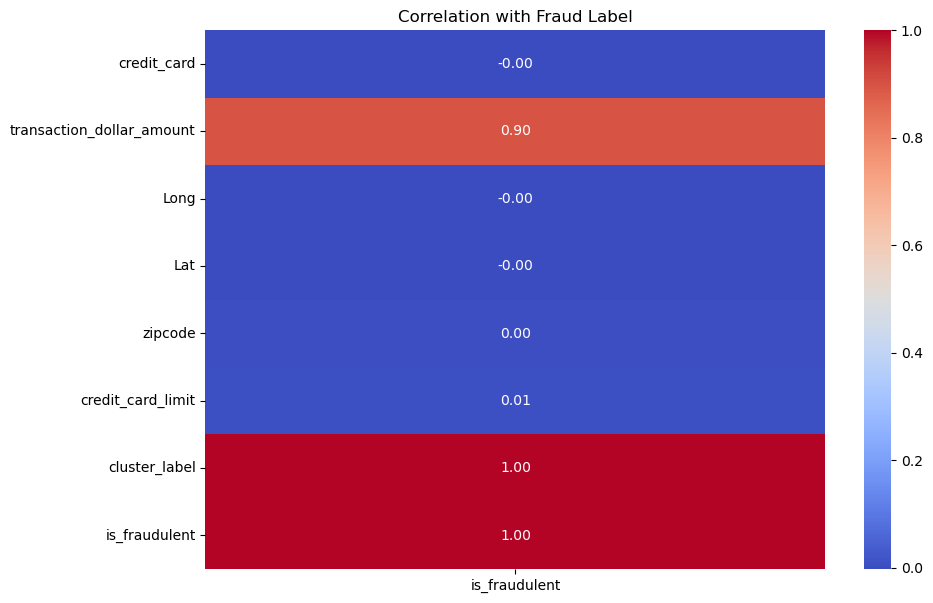

In [41]:
plt.figure(figsize=(10, 7))
correlation_matrix = model.df.corr()
sns.heatmap(correlation_matrix[['is_fraudulent']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Fraud Label')
plt.show()

Text(0.5, 0, 'state')

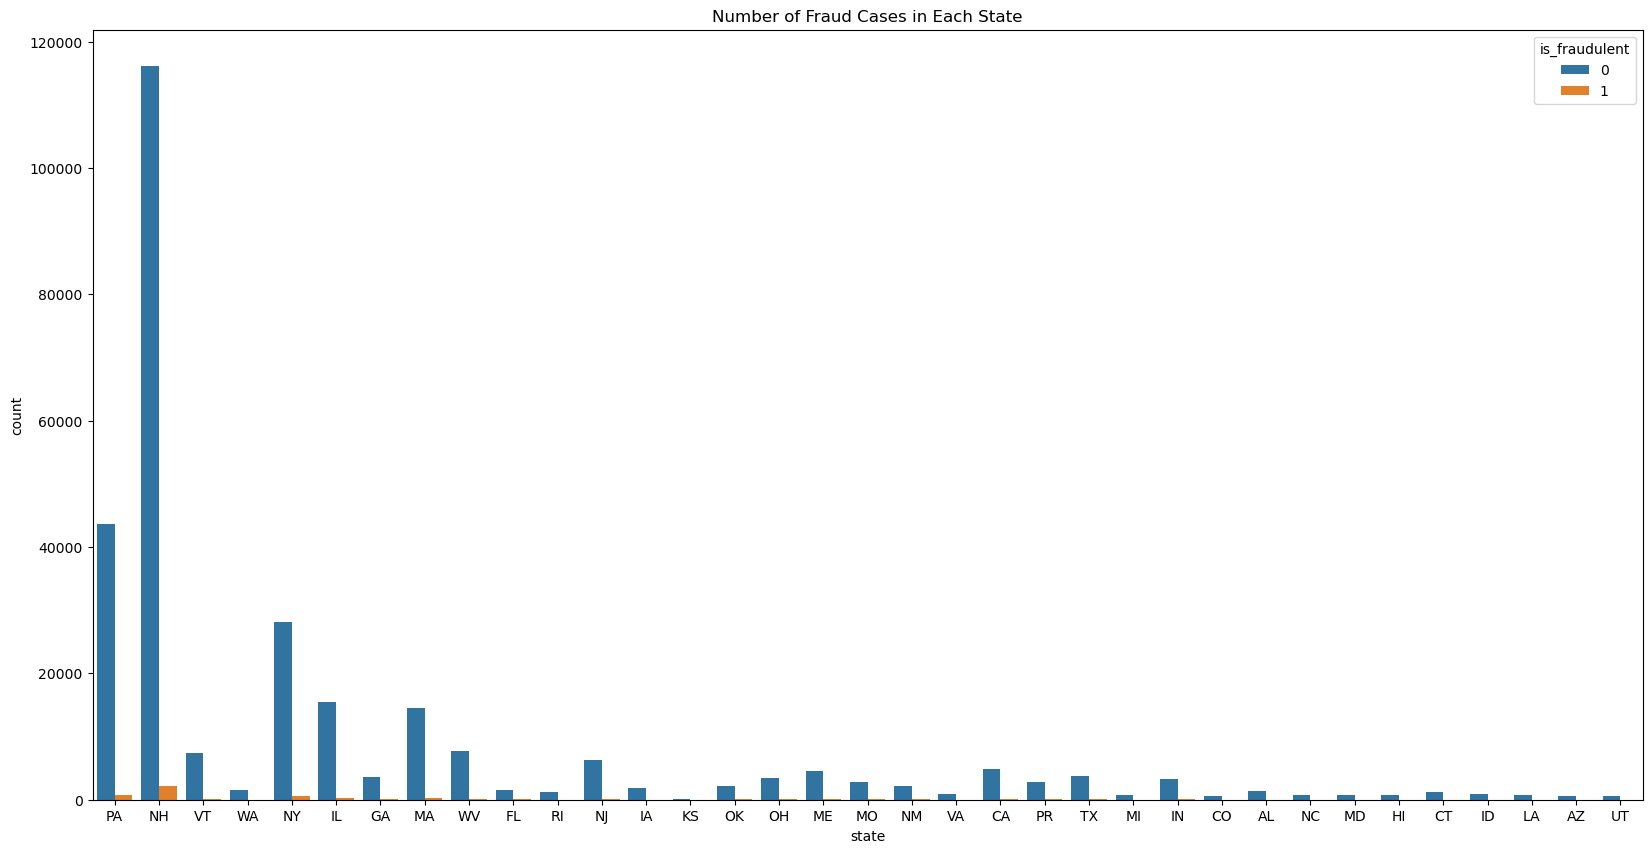

In [45]:
plt.figure(figsize=(20, 10))
sns.countplot(data=model.df, x='state', hue='is_fraudulent')
plt.title('Number of Fraud Cases in Each State')
plt.xlabel('state')